In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Winery Growth in the US from (2009 - 2017)

In [3]:
csvpath_WR = os.path.join('..', 'Data','Clean', 'us_wineries_2009_2019_clean.csv')
csvpath_AC = os.path.join('..', 'Data','Clean', 'Per_Capita_alcohol_graph.csv')
WR_df = pd.read_csv(csvpath_WR)
AC_df = pd.read_csv(csvpath_AC)
#Renaming Columns
WR_df = WR_df.rename(columns={'year':'Year', 'number of wineries in US':'# Wineries in US'})
AC_df = AC_df.rename(columns={'Wine':'Per capita_Gal of wine'})

In [4]:
# combining both csv.files
merged_wine = pd.merge(WR_df,AC_df, how='outer', on='Year')
merged_wine

,Year,# Wineries in US,Per capita_Gal of wine
0,2009,6357,0.39
1,2010,6941,0.38
2,2011,7306,0.41
3,2012,7396,0.42
4,2013,7498,0.42
5,2014,7762,0.43
6,2015,8287,0.42
7,2016,8702,0.43
8,2017,9091,0.43
9,2018,9654,NaN


In [5]:
# dropping null row
merged_wine = merged_wine.dropna(how='any')
merged_wine

,Year,# Wineries in US,Per capita_Gal of wine
0,2009,6357,0.39
1,2010,6941,0.38
2,2011,7306,0.41
3,2012,7396,0.42
4,2013,7498,0.42
5,2014,7762,0.43
6,2015,8287,0.42
7,2016,8702,0.43
8,2017,9091,0.43


<IPython.core.display.Javascript object>


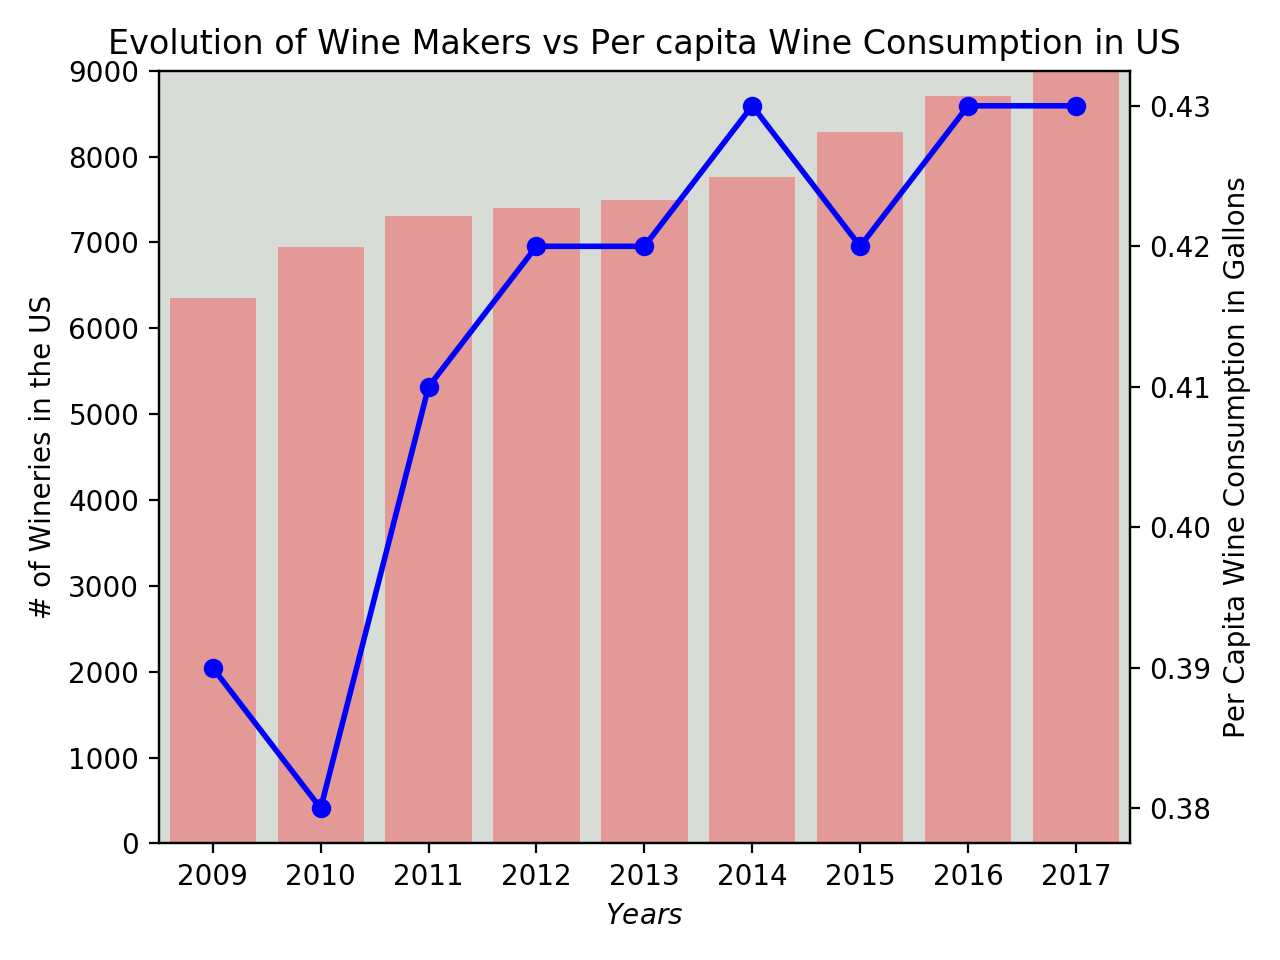

In [6]:
#Plot graph with 2 "y" axes
fig, ax1 = plt.subplots()

#Plot bars

ax1.bar(merged_wine['Year'],merged_wine['# Wineries in US'], color='r', alpha = 0.3, align ='center')
ax1.set_xlabel('$Years$')
ax1.set_ylabel('# of Wineries in the US')
ax = plt.gca()
ax.set_xlim([2008.5,2017.5])
ax.set_ylim([0,9000])
ax.set_facecolor("xkcd:light grey")

# Setting ax2 to be the second "y" axis with x shared
ax2 = ax1.twinx()

# line Plot
ax2.plot(merged_wine['Year'],merged_wine['Per capita_Gal of wine'], marker="o", color="b", linewidth=2)
ax2.set_ylabel('Per Capita Wine Consumption in Gallons')

plt.title('Evolution of Wine Makers vs Per capita Wine Consumption in US')
plt.tight_layout()
plt.show()
plt.savefig("../Images/Wine_US.png")

# Winery Growth on Five Most Important States

In [7]:
csvpath_PC = os.path.join('..', 'Data','Clean', 'Per_CapitaWine_state_final.csv')
csvpath_BD = os.path.join('..', 'Data','Clean', 'Bonded_wine_state_2009-2017.csv')
PC_df = pd.read_csv(csvpath_PC)
BD_df = pd.read_csv(csvpath_BD)

# combining both csv.files
merged = pd.merge(PC_df,BD_df, how='outer', on='geographic area')
merged

,Wine2009,geographic area,Wine2017,Per Capita Increase(2009-2017),Wine_Maker_Growth(2009-2017)
0,0.57,California,0.58,0.01,1864.0
1,0.46,Colorado,0.52,0.06,88.0
2,0.49,Oregon,0.59,0.10,320.0
3,0.28,Texas,0.35,0.07,362.0
4,0.51,Washington,0.52,0.01,429.0


<IPython.core.display.Javascript object>


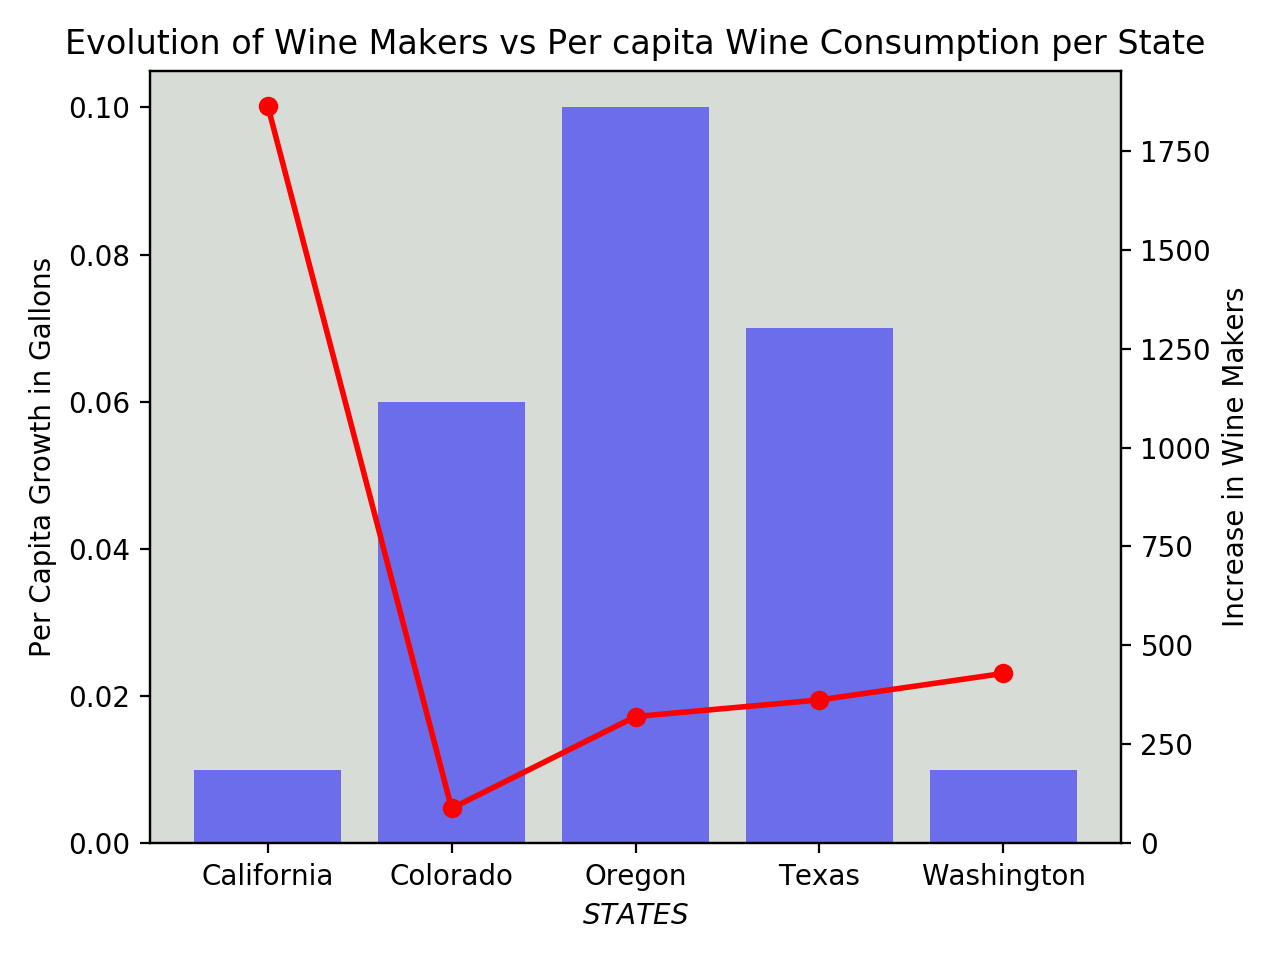

In [8]:
#Plot graph with 2 "y" axes
fig, a1 = plt.subplots()

#Plot bars
a1.set_facecolor("xkcd:light grey")

a1.bar(merged['geographic area'],merged['Per Capita Increase(2009-2017)'], color='b', alpha = 0.5, align ='center')
a1.set_xlabel('$STATES$')
a1.set_ylabel('Per Capita Growth in Gallons')


# Setting ax2 to be the second "y" axis with x shared
a2 = a1.twinx()

# line Plot
a2.plot(merged['geographic area'],merged['Wine_Maker_Growth(2009-2017)'], marker="o", color="r", linewidth=2)
a2.set_ylabel('Increase in Wine Makers')



plt.title('Evolution of Wine Makers vs Per capita Wine Consumption per State')
plt.tight_layout()
plt.show()
plt.savefig("../Images/Wine_State.png")